### Analítica Computacional para la toma de Decisiones
### Taller 6 - Intro a Redes Neuronales

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [33]:
# Cargar los datos
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                        'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

#### Punto 1

In [34]:
# Seleccionar las columnas continuas
X = df[['Displacement', 'Horsepower', 'Weight', 'Acceleration']].values
y = df['MPG'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo base
model_base = Sequential()
model_base.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_base.add(Dense(32, activation='relu'))
model_base.add(Dense(1))  # Salida para regresión

# Compilar el modelo
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Punto 2

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 566.5662 - val_loss: 661.6456
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 587.9161 - val_loss: 641.9947
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 547.1699 - val_loss: 620.2756
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 506.1150 - val_loss: 594.9177
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 493.6940 - val_loss: 564.2905
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 464.0650 - val_loss: 527.2260
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 424.5375 - val_loss: 483.0097
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 396.1605 - val_loss: 431.4413
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 389.1502 - val_loss: 373.7130
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 297.7363 - val_loss: 313.9599
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 254.7235 - val_loss: 252.9836
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━

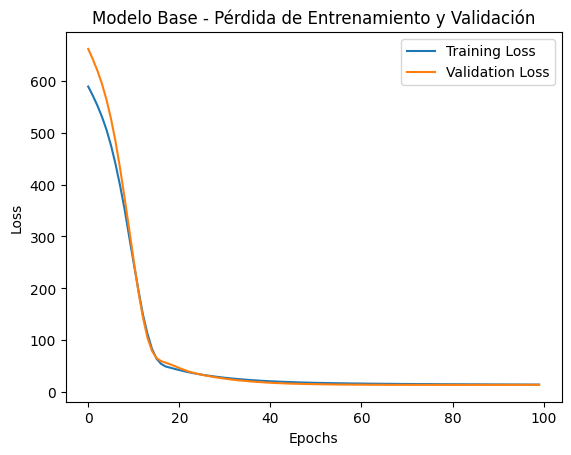

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6127 
Modelo Base - Test Loss: 15.586301803588867
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


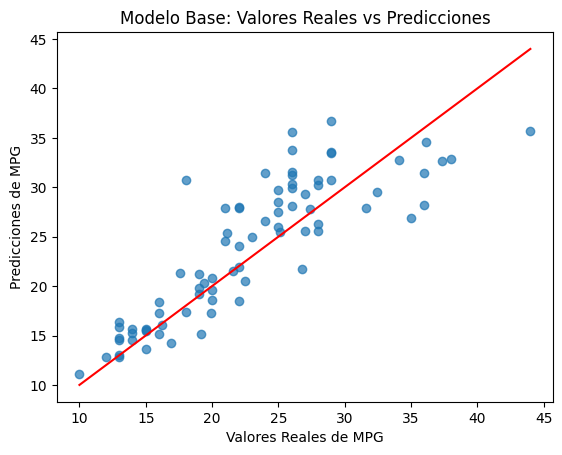

In [35]:
# Entrenar el modelo
history_base = model_base.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Graficar el historial de pérdida
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Modelo Base - Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Evaluar el modelo en el conjunto de prueba
test_loss_base = model_base.evaluate(X_test, y_test)
print(f"Modelo Base - Test Loss: {test_loss_base}")

# Hacer predicciones
y_pred_base = model_base.predict(X_test)

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_base, label='Predicciones vs Valores Reales', alpha=0.7)
plt.xlabel('Valores Reales de MPG')
plt.ylabel('Predicciones de MPG')
plt.title('Modelo Base: Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea perfecta
plt.show()

Crear funciones para gráficos

In [36]:
def plot_historial_perdida (history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [37]:
def plot_predicciones (y_pred_1, label_1, y_pred_2, label_2, y_pred_3, label_3):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_1, label=label_1, alpha=0.5)
    plt.scatter(y_test, y_pred_2, label=label_2, alpha=0.5)
    plt.scatter(y_test, y_pred_3, label=label_3, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Valores Reales de MPG')
    plt.ylabel('Predicciones de MPG')
    plt.title('Comparación de Modelos: Predicciones vs Valores Reales')
    plt.legend()
    plt.show()

#### Punto 3: Modificar el número de neuronas

In [38]:
def create_model(neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# 32 neuronas
model_32 = create_model(32)
history_32 = model_32.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 128 neuronas
model_128 = create_model(128)
history_128 = model_128.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 256 neuronas
model_256 = create_model(256)
history_256 = model_256.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 613.9120 - val_loss: 680.7939
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 630.3296 - val_loss: 670.3193
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 621.4576 - val_loss: 659.7950
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 587.5527 - val_loss: 648.3800
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 571.9909 - val_loss: 635.5098
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 563.0734 - val_loss: 621.2110
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 495.6075 - val_loss: 604.9962
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 524.2332 - val_loss: 586.3734
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 499.7977 - val_loss: 565.0011
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 471.5159 - val_loss: 541.2023
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 453.3176 - val_loss: 514.7151
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

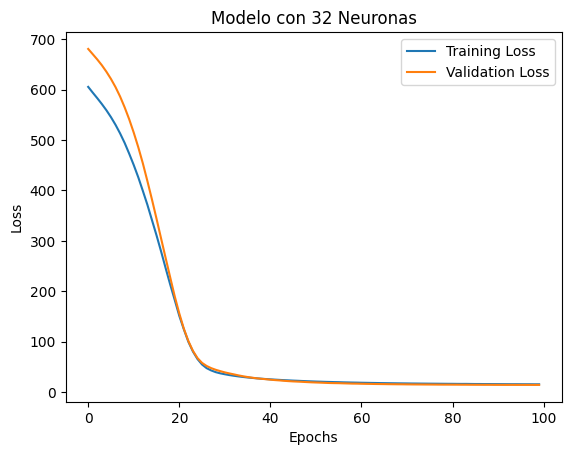

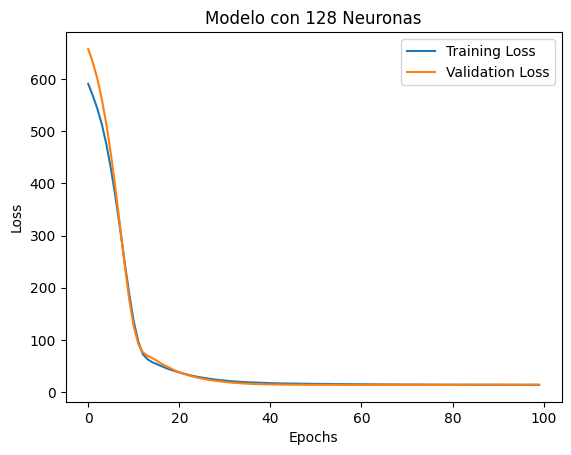

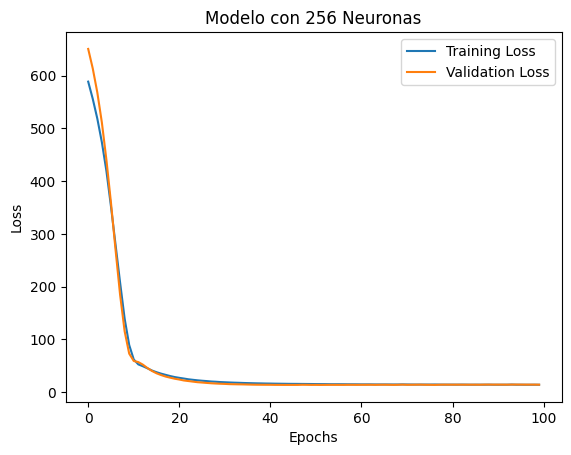

In [39]:
# Graficar historial de pérdida cada modelo
plot_historial_perdida(history_32, 'Modelo con 32 Neuronas')
plot_historial_perdida(history_128, 'Modelo con 128 Neuronas')
plot_historial_perdida(history_256, 'Modelo con 256 Neuronas')

In [40]:
# Evaluar cada modelo en el conjunto de prueba
test_loss_32 = model_32.evaluate(X_test, y_test)
test_loss_128 = model_128.evaluate(X_test, y_test)
test_loss_256 = model_256.evaluate(X_test, y_test)

print(f"Modelo con 32 Neuronas - Test Loss: {test_loss_32}")
print(f"Modelo con 128 Neuronas - Test Loss: {test_loss_128}")
print(f"Modelo con 256 Neuronas - Test Loss: {test_loss_256}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6014 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4170 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.8035 
Modelo con 32 Neuronas - Test Loss: 16.96463966369629
Modelo con 128 Neuronas - Test Loss: 15.172503471374512
Modelo con 256 Neuronas - Test Loss: 16.503828048706055


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


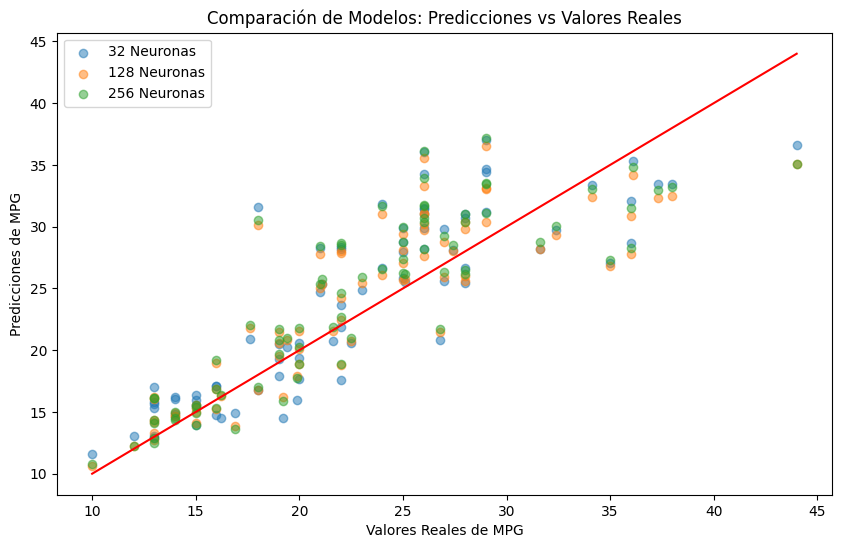

In [41]:
# Hacer predicciones de cada modelo
y_pred_32 = model_32.predict(X_test)
y_pred_128 = model_128.predict(X_test)
y_pred_256 = model_256.predict(X_test)

# Graficar las predicciones en un solo grafico
plot_predicciones(y_pred_32, '32 Neuronas', y_pred_128, '128 Neuronas', y_pred_256, '256 Neuronas')

#### Punto 4: Modificar el número de capas

In [42]:
def create_model_layers(layers):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(layers):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# 2 capas
model_2_layers = create_model_layers(2)
history_2_layers = model_2_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 3 capas
model_3_layers = create_model_layers(3)
history_3_layers = model_3_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 4 capas
model_4_layers = create_model_layers(4)
history_4_layers = model_4_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 592.3372 - val_loss: 656.9542
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 563.1584 - val_loss: 622.0878
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 532.6710 - val_loss: 569.0539
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 459.4494 - val_loss: 485.9231
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 406.4589 - val_loss: 365.7216
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 310.0376 - val_loss: 223.2693
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 167.9716 - val_loss: 106.3401
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.8749 - val_loss: 63.2043
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.2153 - val_loss: 63.3138
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.4660 - val_loss: 50.6158
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45.3878 - val_loss: 42.7433
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

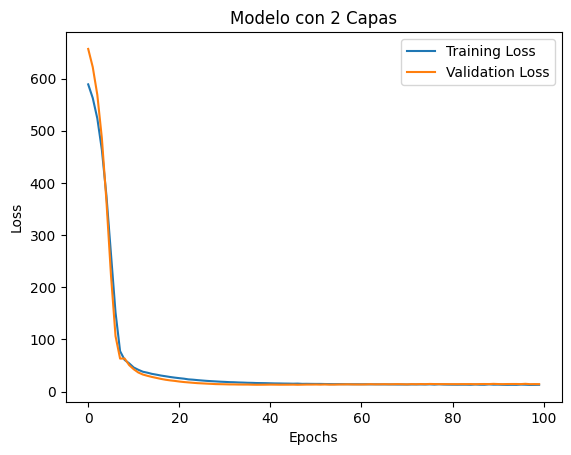

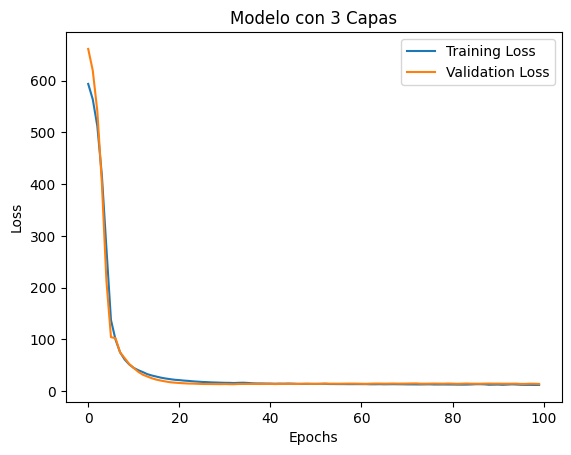

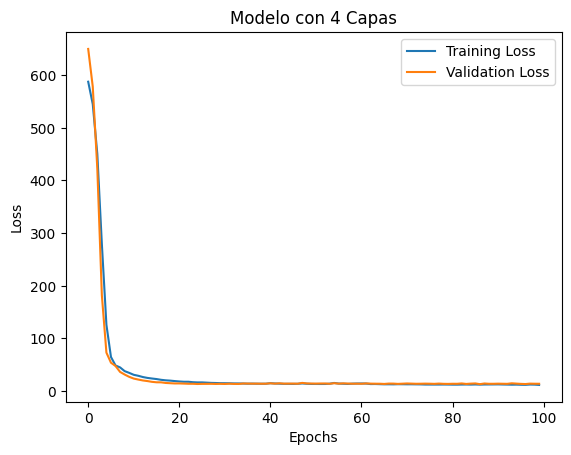

In [43]:
# Graficar historial de pérdida cada modelo
plot_historial_perdida(history_2_layers, 'Modelo con 2 Capas')
plot_historial_perdida(history_3_layers, 'Modelo con 3 Capas')
plot_historial_perdida(history_4_layers, 'Modelo con 4 Capas')

In [44]:
# Evaluar cada modelo en el conjunto de prueba
test_loss_2 = model_2_layers.evaluate(X_test, y_test)
test_loss_3 = model_3_layers.evaluate(X_test, y_test)
test_loss_4 = model_4_layers.evaluate(X_test, y_test)

print(f"Modelo con 2 Capas - Test Loss: {test_loss_2}")
print(f"Modelo con 3 Capas - Test Loss: {test_loss_3}")
print(f"Modelo con 4 Capas - Test Loss: {test_loss_4}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8484 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.5463 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3576 
Modelo con 2 Capas - Test Loss: 16.99044418334961
Modelo con 3 Capas - Test Loss: 15.743049621582031
Modelo con 4 Capas - Test Loss: 17.9379825592041


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


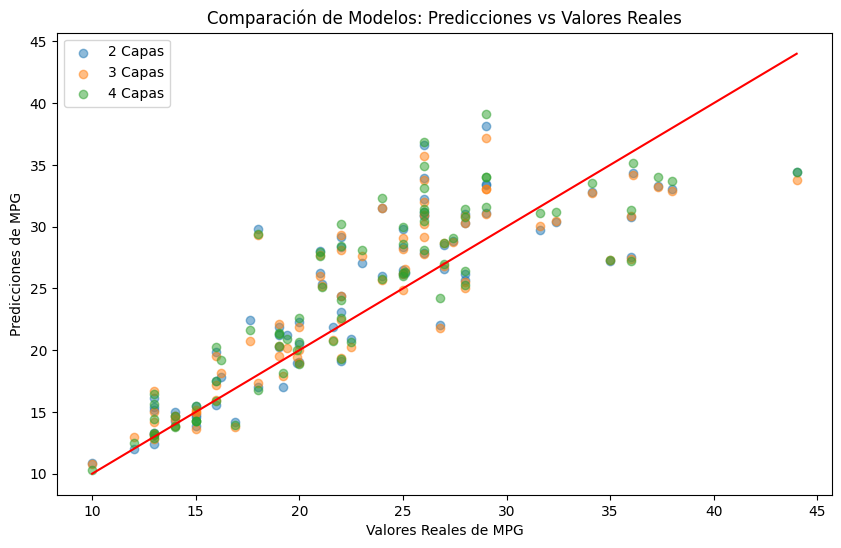

In [45]:
# Hacer predicciones de cada modelo
y_pred_2 = model_2_layers.predict(X_test)
y_pred_3 = model_3_layers.predict(X_test)
y_pred_4 = model_4_layers.predict(X_test)

# Graficar las predicciones en un solo grafico
plot_predicciones(y_pred_2, '2 Capas', y_pred_3, '3 Capas', y_pred_4, '4 Capas')

#### Punto 5: Modificar las funciones de activación

In [50]:
def create_model_activation(activation):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# tanh
model_tanh = create_model_activation('tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# sigmoid
model_sigmoid = create_model_activation('sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# elu
model_elu = create_model_activation('elu')
history_elu = model_elu.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 596.4790 - val_loss: 671.2275
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 594.6144 - val_loss: 646.3149
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 566.9183 - val_loss: 622.1493
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 565.1948 - val_loss: 596.9292
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 524.8139 - val_loss: 572.7773
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 501.2419 - val_loss: 549.9724
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 503.5313 - val_loss: 528.4908
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 495.4934 - val_loss: 507.8992
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 487.0193 - val_loss: 488.4978
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 467.8579 - val_loss: 469.6310
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 444.8512 - val_loss: 449.6104
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━

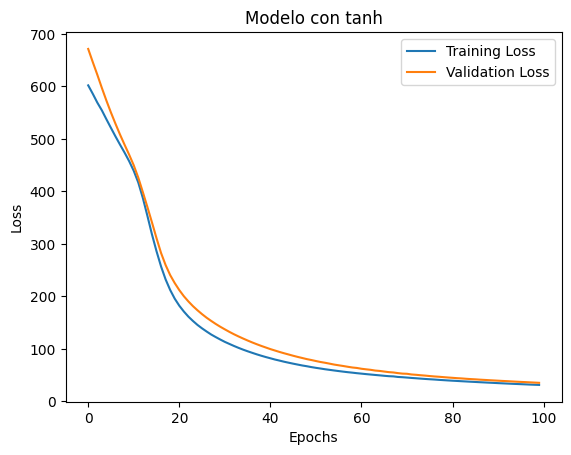

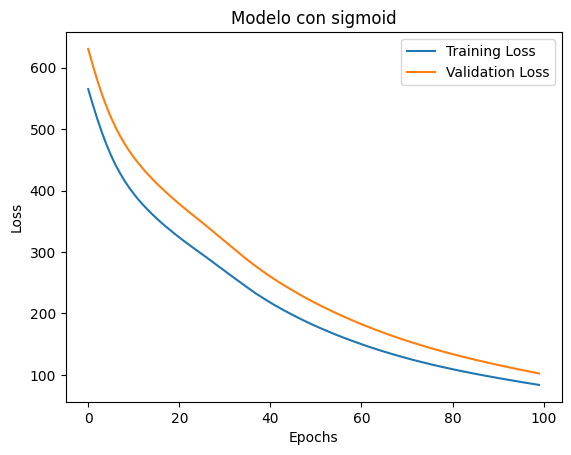

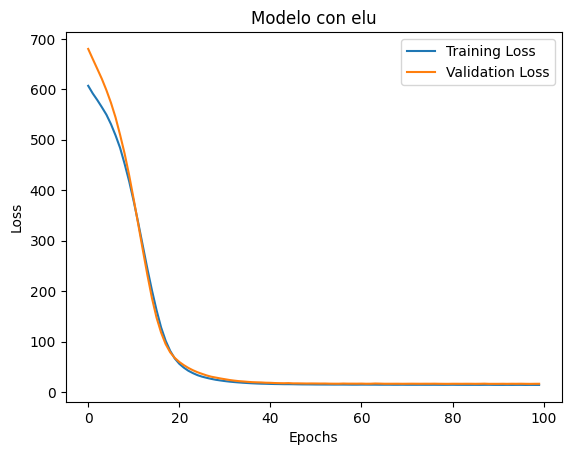

In [51]:
# Graficar historial de pérdida cada modelo
plot_historial_perdida(history_tanh, 'Modelo con tanh')
plot_historial_perdida(history_sigmoid, 'Modelo con sigmoid')
plot_historial_perdida(history_elu, 'Modelo con elu')

In [52]:
# Evaluar cada modelo en el conjunto de prueba
test_loss_tanh = model_tanh.evaluate(X_test, y_test)
test_loss_sigmoid = model_sigmoid.evaluate(X_test, y_test)
test_loss_elu = model_elu.evaluate(X_test, y_test)

print(f"Modelo con tanh - Test Loss: {test_loss_tanh}")
print(f"Modelo con sigmoid - Test Loss: {test_loss_sigmoid}")
print(f"Modelo con elu - Test Loss: {test_loss_elu}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.3078 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.3166 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4435 
Modelo con tanh - Test Loss: 22.706066131591797
Modelo con sigmoid - Test Loss: 67.07237243652344
Modelo con elu - Test Loss: 16.89259910583496


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


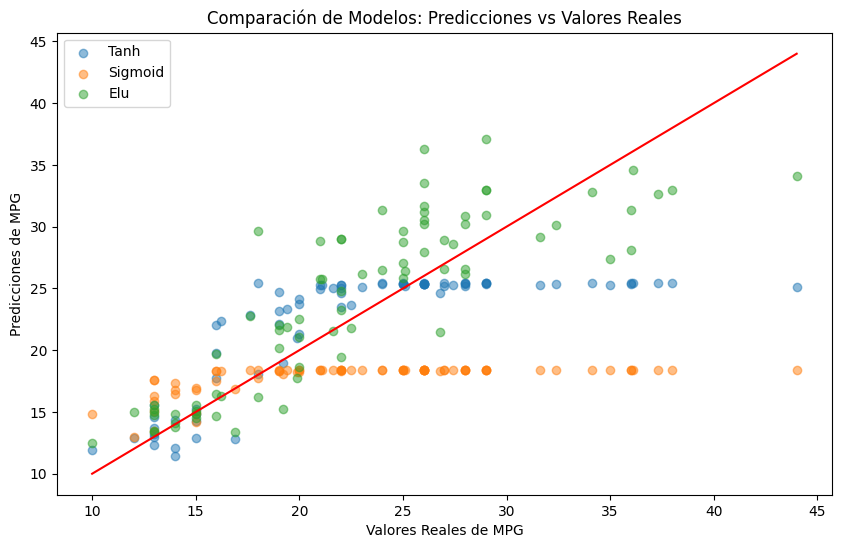

In [53]:
# Hacer predicciones de cada modelo
y_pred_tanh = model_tanh.predict(X_test)
y_pred_sigmoid = model_sigmoid.predict(X_test)
y_pred_elu = model_elu.predict(X_test)

# Graficar las predicciones en un solo grafico
plot_predicciones(y_pred_tanh, 'Tanh', y_pred_sigmoid, 'Sigmoid', y_pred_elu, 'Elu')

#### Punto 6: Proponer dos modelos